In [1]:
from pytriqs.gf import *
from pytriqs.archive import *
from pytriqs.plot.mpl_interface import *
import numpy as np
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['savefig.dpi']=100
plt.rcParams['figure.figsize'] = (8.0,6.0)

Solution of the exercises
=========================

Solution of exercise 1
----------------------

The script below solves the two-orbital Hubbard model for a variety of filling, $U$ and $J$.

In [ ]:
# %load run_two_bands.py
from pytriqs.gf import *
from pytriqs.operators import *
from pytriqs.archive import *
from triqs_cthyb import Solver
from itertools import product
import numpy as np

import os
if not os.path.exists('results_two_bands'):
    os.makedirs('results_two_bands')

# Parameters of the model
t = 1.0
beta = 10.0
n_loops = 10
filling = 'half' # or 'quarter'
n_orbitals = 2

# Construct the solver
S = Solver(beta = beta, gf_struct = [('up-0',[0]), ('up-1',[0]), ('down-0',[0]), ('down-1',[0])] )

for coeff in [0.0, 0.1, 0.2]:

    # Run for several values of U
    for U in np.arange(1.0, 13.0, 1.0):

        J = coeff * U

        # Expression of mu for half and quarter filling
        if filling == 'half':
            mu = 0.5*U + 0.5*(U-2*J) + 0.5*(U-3*J)
        elif filling == 'quarter':
            mu = -0.81 + (0.6899-1.1099*coeff)*U + (-0.02548+0.02709*coeff-0.1606*coeff**2)*U**2

        # Set the interacting Kanamori hamiltonian
        h_int = Operator()
        for o in range(0,n_orbitals):
            h_int += U*n('up-%s'%o,0)*n('down-%s'%o,0)
        for o1,o2 in product(range(0,n_orbitals),range(0,n_orbitals)):
            if o1==o2: continue
            h_int += (U-2*J)*n('up-%s'%o1,0)*n('down-%s'%o2,0)
        for o1,o2 in product(range(0,n_orbitals),range(0,n_orbitals)):
            if o2>=o1: continue;
            h_int += (U-3*J)*n('up-%s'%o1,0)*n('up-%s'%o2,0)
            h_int += (U-3*J)*n('down-%s'%o1,0)*n('down-%s'%o2,0)
        for o1,o2 in product(range(0,n_orbitals),range(0,n_orbitals)):
            if o1==o2: continue
            h_int += -J*c_dag('up-%s'%o1,0)*c_dag('down-%s'%o1,0)*c('up-%s'%o2,0)*c('down-%s'%o2,0)
            h_int += -J*c_dag('up-%s'%o1,0)*c_dag('down-%s'%o2,0)*c('up-%s'%o2,0)*c('down-%s'%o1,0)

        # This is a first guess for G
        S.G0_iw << inverse(iOmega_n + mu - t**2 * SemiCircular(2*t))

        # DMFT loop with self-consistency
        for i in range(n_loops):

            print "\n\nIteration = %i / %i" % (i+1, n_loops)

            # Symmetrize the Green's function and use self-consistency
            if i > 0:
                g = 0.25 * ( S.G_iw['up-0'] + S.G_iw['up-1'] + S.G_iw['down-0'] + S.G_iw['down-1'] )
                for name, g0 in S.G0_iw:
                    g0 << inverse(iOmega_n + mu - t**2 * g)

            # Solve the impurity problem
            S.solve(h_int = h_int,
                    n_cycles  = 30000,
                    length_cycle = 100,
                    n_warmup_cycles = 5000)

            # Check density
            for name, g in S.G_iw:
                print name, ": ",g.density()[0,0].real

            # Save iteration in archive
            with HDFArchive("results_two_bands/%s-U%.2f-J%.2f.h5"%(filling,U,J)) as A:
                A['G-%i'%i] = S.G_iw
                A['Sigma-%i'%i] = S.Sigma_iw


Starting run with 1 MPI rank(s) at : 2020-03-09 16:03:25.818777




Iteration = 1 / 10
up-0 :  0.501666984984
up-1 :  0.470360923522
down-0 :  0.468129242843
down-1 :  0.486875020629


Iteration = 2 / 10
up-0 :  0.486246552509
up-1 :  0.477421782582
down-0 :  0.506757296363
down-1 :  0.486873707741


Iteration = 3 / 10
up-0 :  0.49575018986
up-1 :  0.485285794603
down-0 :  0.500978001217
down-1 :  0.506984361159


Iteration = 4 / 10
up-0 :  0.498287769293
up-1 :  0.502449889437
down-0 :  0.522932052356
down-1 :  0.511231512063


Iteration = 5 / 10
up-0 :  0.475525931198
up-1 :  0.541553571107
down-0 :  0.498645624863
down-1 :  0.448788138844


Iteration = 6 / 10
up-0 :  0.511473299633
up-1 :  0.527611535912
down-0 :  0.484602356081
down-1 :  0.488573207942


Iteration = 7 / 10
up-0 :  0.536161580708
up-1 :  0.507443087407
down-0 :  0.513035135764
down-1 :  0.497110496056


Iteration = 8 / 10
up-0 :  0.512150164968
up-1 :  0.506911488914
down-0 :  0.545659590631
down-1 :  0.528457003531


Iteration = 9 / 10
up-0 :  0.517256190714
up-1 :  0.51729806263



Iteration = 2 / 10
up-0 :  0.57053283676
up-1 :  0.484802121307
down-0 :  0.513525760384
down-1 :  0.573682697146


Iteration = 3 / 10
up-0 :  0.43727686645
up-1 :  0.526065549812
down-0 :  0.471185857057
down-1 :  0.566996288678


Iteration = 4 / 10
up-0 :  0.463507916321
up-1 :  0.476883356774
down-0 :  0.534311651247
down-1 :  0.512560892389


Iteration = 5 / 10
up-0 :  0.508714569692
up-1 :  0.461909897163
down-0 :  0.544989672209
down-1 :  0.478989639961


Iteration = 6 / 10
up-0 :  0.531706061338
up-1 :  0.516216460299
down-0 :  0.578274802905
down-1 :  0.458967911258


Iteration = 7 / 10
up-0 :  0.4943843724
up-1 :  0.490287063656
down-0 :  0.513923753007
down-1 :  0.525287348341


Iteration = 8 / 10
up-0 :  0.445167490219
up-1 :  0.520832828666
down-0 :  0.532852905031
down-1 :  0.519964317525


Iteration = 9 / 10
up-0 :  0.50178126293
up-1 :  0.548076345031
down-0 :  0.513072504689
down-1 :  0.581845415285


Iteration = 10 / 10
up-0 :  0.443476478753
up-1 :  0.518231442234
d

Solution of exercise 2
----------------------

The solution of the exercise is in the script called `run_two_bands.py` in the tutorial directory.
The script was run from the shell to see the Monte Carlo progress. As you can see in the script, the Green's functions and self-energies are saved in archives. These archives are in the `results_two_bands` subdirectory. Here is a plot of
the Green's functions for different values of $U$ at given $J$'s.

### J = 0.0

You will see that the Mott transition is somewhere between 6.0 and 7.0.

(0, 10)

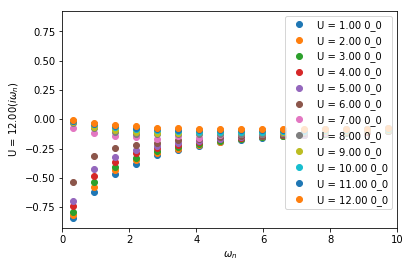

In [3]:
coeff = 0.0
for U in np.arange(1.0, 13.0):

    J = coeff * U
    A = HDFArchive("results_two_bands/half-U%.2f-J%.2f.h5"%(U,J), 'r')
    oplot(A['G-9']['up-0'].imag, 'o', name="U = %.2f"%U)

plt.xlim(0,10)

### J = 0.1 U

You will see that the Mott transition is somewhere between 4.0 and 5.0.

(0, 10)

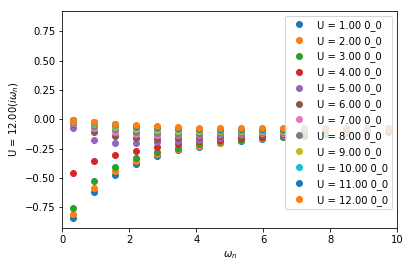

In [4]:
coeff = 0.1
for U in np.arange(1.0, 13.0):

    J = coeff * U
    A = HDFArchive("results_two_bands/half-U%.2f-J%.2f.h5"%(U,J), 'r')
    oplot(A['G-9']['up-0'].imag, 'o', name="U = %.2f"%U)

plt.xlim(0,10)

### J = 0.2 U

You will see that the Mott transition is somewhere between 3.0 and 4.0.

(0, 10)

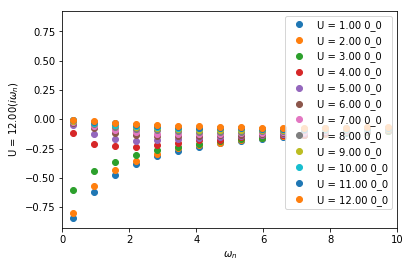

In [5]:
coeff = 0.2
for U in np.arange(1.0, 13.0):

    J = coeff * U
    A = HDFArchive("results_two_bands/half-U%.2f-J%.2f.h5"%(U,J), 'r')
    oplot(A['G-9']['up-0'].imag, 'o', name="U = %.2f"%U)

plt.xlim(0,10)

### Conclusion of Exercise 2

The value of $U_c$ is decreasing with increasing values of $J$! Can you understand why?

Solution of exercise 3
----------------------

The solution of the exercise is again the script called `run_two_bands.py` in the tutorial directory.
You will have to change `filling = 'quarter'`. The generated archives are in the `results` subdirectory. Here is a plot of
the Green's functions for different values of $U$ at given $J$'s.

### J = 0.0

You will se that the Mott transition is somewhere between 5.0 and 6.0.

(0, 10)

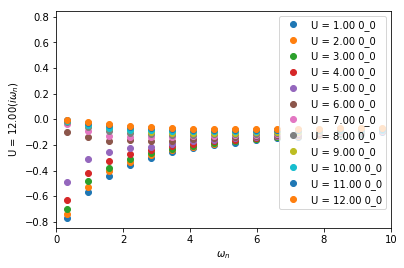

In [6]:
coeff = 0.0
for U in np.arange(1.0, 13.0):

    J = coeff * U
    A = HDFArchive("results_two_bands/quarter-U%.2f-J%.2f.h5"%(U,J), 'r')
    oplot(A['G-9']['up-0'].imag, 'o', name="U = %.2f"%U)

plt.xlim(0,10)

### J = 0.1 U

You will see that the Mott transition is somewhere between 7.0 and 8.0.

(0, 10)

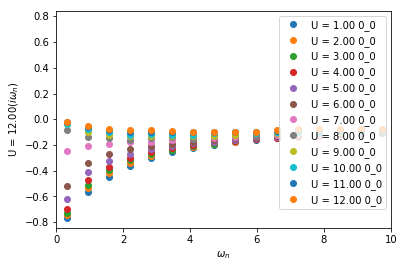

In [7]:
coeff = 0.1
for U in np.arange(1.0, 13.0):

    J = coeff * U
    A = HDFArchive("results_two_bands/quarter-U%.2f-J%.2f.h5"%(U,J), 'r')
    oplot(A['G-9']['up-0'].imag, 'o', name="U = %.2f"%U)

plt.xlim(0,10)

### J = 0.2 U

You will see that the Mott transition happens at values of $U$ larger than 12.

(0, 10)

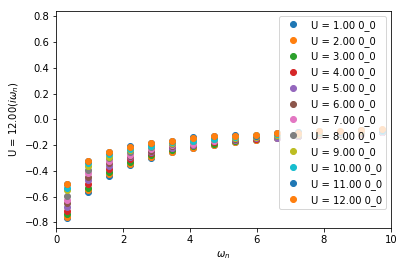

In [8]:
coeff = 0.2
for U in np.arange(1.0, 13.0):

    J = coeff * U
    A = HDFArchive("results_two_bands/quarter-U%.2f-J%.2f.h5"%(U,J), 'r')
    oplot(A['G-9']['up-0'].imag, 'o', name="U = %.2f"%U)

plt.xlim(0,10)

### Conclusion of Exercise 3

Now the value of $U_c$ is increasing with increasing values of $J$! Why?